In [1]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input,Dense
from keras.models import Model,Sequential
from keras.datasets import mnist


Using TensorFlow backend.


In [2]:
# Load Data
(X_train,_),(X_test,_) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# Scaling the data to 0 and 1
X_train = X_train.astype('float32')/float(X_train.max())
X_test = X_test.astype('float32')/float(X_test.max())

In [6]:
# Inpsect our data (The training data has 60k images while testing data has 10k images. All the sets have resolution of 28x28)
print("Training set : ", X_train.shape)
print("Testing set : ", X_test.shape)

Training set :  (60000, 28, 28)
Testing set :  (10000, 28, 28)


In [7]:
# Reshaping our images into matrices
X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print("Training set : ", X_train.shape) # The resolution has changed
print("Testing set : ", X_test.shape)


Training set :  (60000, 784)
Testing set :  (10000, 784)


In [8]:
input_dim = X_train.shape[1]
encoding_dim = 32
compression_factor = float(input_dim/encoding_dim)

autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, input_shape = (input_dim,), activation = 'relu'))
autoencoder.add(Dense(input_dim, activation = 'sigmoid'))

input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')
autoencoder.fit(X_train,X_train, epochs=50, batch_size= 256, shuffle = True, validation_data=(X_test,X_test))

W0813 02:21:46.960132 140522938300288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 02:21:47.019602 140522938300288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 02:21:47.028782 140522938300288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 02:21:47.071760 140522938300288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 02:21:47.096332 140522938300288 deprecation_wrappe

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.2776 - val_loss: 0.1859
Epoch 2/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1679 - val_loss: 0.1513
Epoch 3/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1427 - val_loss: 0.1329
Epoch 4/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1283 - val_loss: 0.1215
Epoch 5/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.1184 - val_loss: 0.1134
Epoch 6/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.1110 - val_loss: 0.1069
Epoch 7/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1057 - val_loss: 0.1025
Epoch 8/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.1019 - val_loss: 0.0994
Epoch 9/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.0993 - val_loss: 0.0970
Epoch

In [0]:
# Test images and prediction
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X_test.shape[0], size = num_images)
encoded_img = encoder.predict(X_test)
decoded_img = autoencoder.predict(X_test)

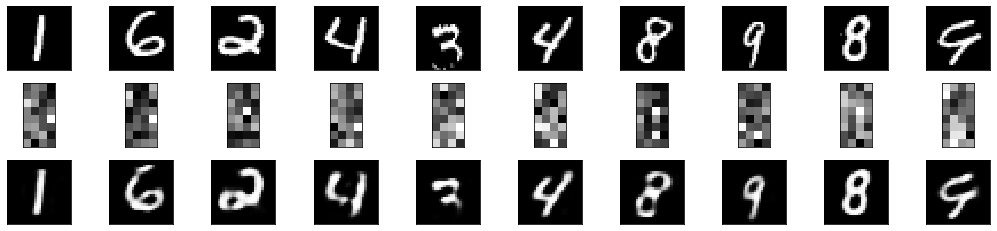

In [12]:
# Display the images and predictions
plt.figure(figsize=(18,4))

for i, image_idx in enumerate(random_test_images):
  # plot input image
  ax = plt.subplot(3,num_images, i+1)
  plt.imshow(X_test[image_idx].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # plot encoded image
  ax = plt.subplot(3, num_images, num_images + i + 1)
  plt.imshow(encoded_img[image_idx].reshape(8,4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # plot reconstructed image
  ax = plt.subplot(3, num_images, 2*num_images + i + 1)
  plt.imshow(decoded_img[image_idx].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()
